In [ ]:
from functions import *
from sklearn import linear_model
%run VLE.ipynb import stud_info, merged_assessments, merged_vle, vle, student_vle
%run Assessments.ipynb import assessments, student_assessment, courses
%run Courses.ipynb import courses

In [2]:
# list of region possibilities
regions = ['East Anglian', 'North Western',
 'South East', 'West Midlands', 'North',
 'South', 'South West', 'East Midlands',
 'Yorkshire', 'London', 'Wales', 'Scotland', 'Ireland']


# list of presentation possibilities
presentations = ['2013B', '2013J', '2014B', '2014J']

# list of module possibilities
modules = ['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG']

# list of gender possibilities
genders = ['M', 'F']

module_presentations = ['AAA2013J', 'AAA2014J', 'BBB2013B', 'BBB2013J', 'BBB2014B',
       'BBB2014J', 'CCC2014B', 'CCC2014J', 'DDD2013B', 'DDD2013J',
       'DDD2014B', 'DDD2014J', 'EEE2013J', 'EEE2014B', 'EEE2014J',
       'FFF2013B', 'FFF2013J', 'FFF2014B', 'FFF2014J', 'GGG2013J',
       'GGG2014B', 'GGG2014J']



# Analysis
---

Now that we have cleaned and explored our files it is time to begin asking questions of our data.

### Student Info Data Visualization

It is important to know who our students are to best cater to them

#### What are the demographic distributions of our students?

**Region**

In [3]:
sorted_regions = stud_info['region'].value_counts().sort_values()
plt.figure(figsize=(25, 3))
plt.title('Student Region Distribution')
sns.countplot(data=stud_info, x=stud_info['region'], order = stud_info['region'].value_counts(ascending=True).index).set(xlabel='Regions', ylabel='Student Count')

NameError: name 'stud_info' is not defined

Here we can see the distribution of students by region. Our students come from various regsions of the UK, Scotland, Ireland and Wales.

**IMD Band**

In [ ]:
# list of imd possibilites
imds = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%']
plt.figure(figsize=(25, 3))
plt.title('Student IMD Band Distribution')
sns.countplot(data=stud_info, x=stud_info['imd'], order=imds).set(xlabel='IMD Bands', ylabel='Student Count')

In this bar graph we see the distribution of students by IMD band. Many students seem to be in more deprived countries with a spike in students in the 10-20% band.

In [ ]:
under_50_imd = stud_info['imd'].value_counts().reset_index().sort_values('index')['imd'][0:5].sum()
total_imd = stud_info['imd'].value_counts().reset_index()['imd'].sum()
perc_under_50_imd = percentage(under_50_imd,total_imd)
md(f'''
{perc_under_50_imd}% of our students are from areas under 50% of the IMD band

* assuming IMD band is a problem
''')

**Age**

In [ ]:
# list of age_band possibilities
ages = ['0-35', '35-55', '55+']
age_freqs = stud_info['age'].value_counts(normalize=True)
plt.figure(figsize=(25, 3))
plt.title('Student Ages')
plt.pie(data=stud_info, x=age_freqs, labels=ages, autopct='%1.1f%%', startangle=90, colors=['green', 'gold', 'red'])
plt.show()

* over 70% of our students are under 35 and under 1% are age 55+

In [ ]:
# multiple pie charts
stud_age_freq = pd.crosstab(stud_info['module_presentation'], values=stud_info['age'], columns=stud_info['age'], aggfunc='count', normalize='index')

fig, axes = plt.subplots(4, 6, figsize=(15, 10))

for i, (idx, row) in enumerate(stud_age_freq.iterrows()):
    ax = axes[i // 6, i % 6]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row, labels=row.index, startangle=90, colors=['green', 'gold', 'red'], normalize=True)
    ax.set_title(idx)

fig.subplots_adjust(wspace=.2)

It seems that most of our students over 35 were interested in the AAA class which also contains the bulk of our 55+ students. The rest of the courses are, as expected, dominated by younger students.

**Gender**

In [ ]:
genders = ['M', 'F']
gender_freqs = stud_info['gender'].value_counts(normalize=True)
plt.figure(figsize=(25, 3))
plt.title('Student Genders')
plt.pie(data=stud_info, x=gender_freqs, autopct='%1.1f%%', startangle=90, colors=['lightskyblue', 'pink'])
plt.legend(labels=genders, bbox_to_anchor=(.8,1), loc='upper left') 

Our male to female student distribution is fairly even with the male population being slightly more dominant

In [ ]:
# multiple pie charts
gender_res_freq = pd.crosstab(stud_info['module_presentation'], values=stud_info['gender'], columns=stud_info['gender'], aggfunc='count', normalize='index')
gender_res_freq = gender_res_freq[['M','F']]
fig, axes = plt.subplots(4, 6, figsize=(15, 10))

for i, (idx, row) in enumerate(gender_res_freq.iterrows()):
    ax = axes[i // 6, i % 6]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row, labels=row.index, startangle=30, colors=['lightskyblue', 'pink'], normalize=False)
    ax.set_title(idx)

fig.subplots_adjust(wspace=.2)

It seems GGG and BBB courses attract many more females than males, while The rest of the courses are dominated by male students.

**Education**

In [ ]:
# list of education possibilities
educations = ['No Formal', 'Under A Level', 'A Level', 'HE', 'Post Grad']
plt.figure(figsize=(20, 3))
plt.title('Student Education Distribution')

sns.countplot(data=stud_info, x=stud_info['education'], order=educations).set(xlabel= 'Student Education Level', ylabel='Student Count')

Most of our students fall Under A Level or at A Level as their furthest education. Post Grad Students and students with no formal education are underrespresented.

**Disability**

In [ ]:
disabilities=['No Disability', 'Disability']
disability_freqs = stud_info['disability'].value_counts(normalize=True)
plt.figure(figsize=(25, 3))
plt.title('Student Disabilities')
plt.pie(data=stud_info, x=disability_freqs, autopct='%1.1f%%', startangle=90, colors=['green', 'gold'])
plt.legend(labels=disabilities, loc='upper left', bbox_to_anchor=(.9,1))

Under 10% of our students identified as having disabilities and so are underrepresented in this group.

**Student Results**

In [ ]:
# list of result possibilities
results = ['Pass', 'Fail', 'Withdrawn', 'Distinction']
result_freqs = stud_info['result'].value_counts(normalize=True)
pass_perc = round((result_freqs[0] * 100), 1)
withdraw_perc = round((result_freqs[1] * 100), 1)
fail_perc = round((result_freqs[2] * 100), 1)
distinct_perc = round((result_freqs[3] * 100), 1)
results_percs = [pass_perc, fail_perc, withdraw_perc, distinct_perc]

fig1, ax = plt.subplots()
ax.pie(results_percs, labels=results, autopct='%1.1f%%', startangle=90,colors=['MediumSeaGreen', 'Tomato', 'LightGray','SlateBlue'])
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Student Results')
plt.show()


In [ ]:
neg_result = round(fail_perc + withdraw_perc)
pos_result = round(pass_perc + distinct_perc)
md(f'''
Here we can see that we have a negative result of withdrawing or failing nearly **{neg_result}%** of the time,
with around **{pos_result}%** of students achieving a positive result of passing or passing with distinction.
''')

In [ ]:
stud_info['module_presentation'] = stud_info['module'] + stud_info['presentation']

In [1020]:
modpres_res_freq = pd.crosstab(stud_info['module_presentation'], values=stud_info['result'], columns=stud_info['result'], aggfunc='count')
modpres_res_freq = modpres_res_freq.reset_index()
modpres_res_freq = modpres_res_freq.astype({'Distinction':int, 'Pass':int, 'Fail':int, 'Withdrawn':int})
modpres_res_freq['total'] = modpres_res_freq['Pass'] + modpres_res_freq['Fail'] + modpres_res_freq['Withdrawn'] + modpres_res_freq['Distinction']
modpres_res_freq[['Distinction','Pass', 'Fail', 'Withdrawn']] = modpres_res_freq[['Distinction','Pass', 'Fail', 'Withdrawn']].div(modpres_res_freq['total'], axis=0) *100
modpres_res_freq = modpres_res_freq[['module_presentation', 'Pass', 'Fail', 'Withdrawn', 'Distinction', 'total']]

Let's see the total students per course

<AxesSubplot:title={'center':'% of Student Passes Per Course'}, xlabel='Course', ylabel='Student Count'>

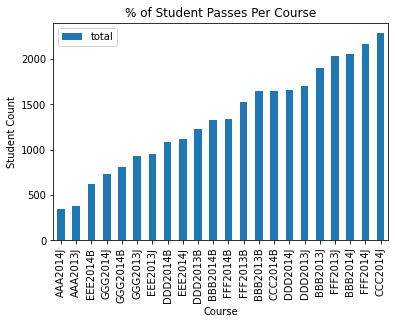

In [1021]:
modpres_res_freq.sort_values(by='total').plot.bar(rot=90, x='module_presentation', y='total', title='% of Student Passes Per Course', xlabel='Course', ylabel='Student Count')

BBB, CCC, DDD and FFF courses seem to be the most popular. Let's see the results for our modules

<AxesSubplot:title={'center':'% of Students with Distinction Per Course'}, xlabel='Course', ylabel='Student Count'>

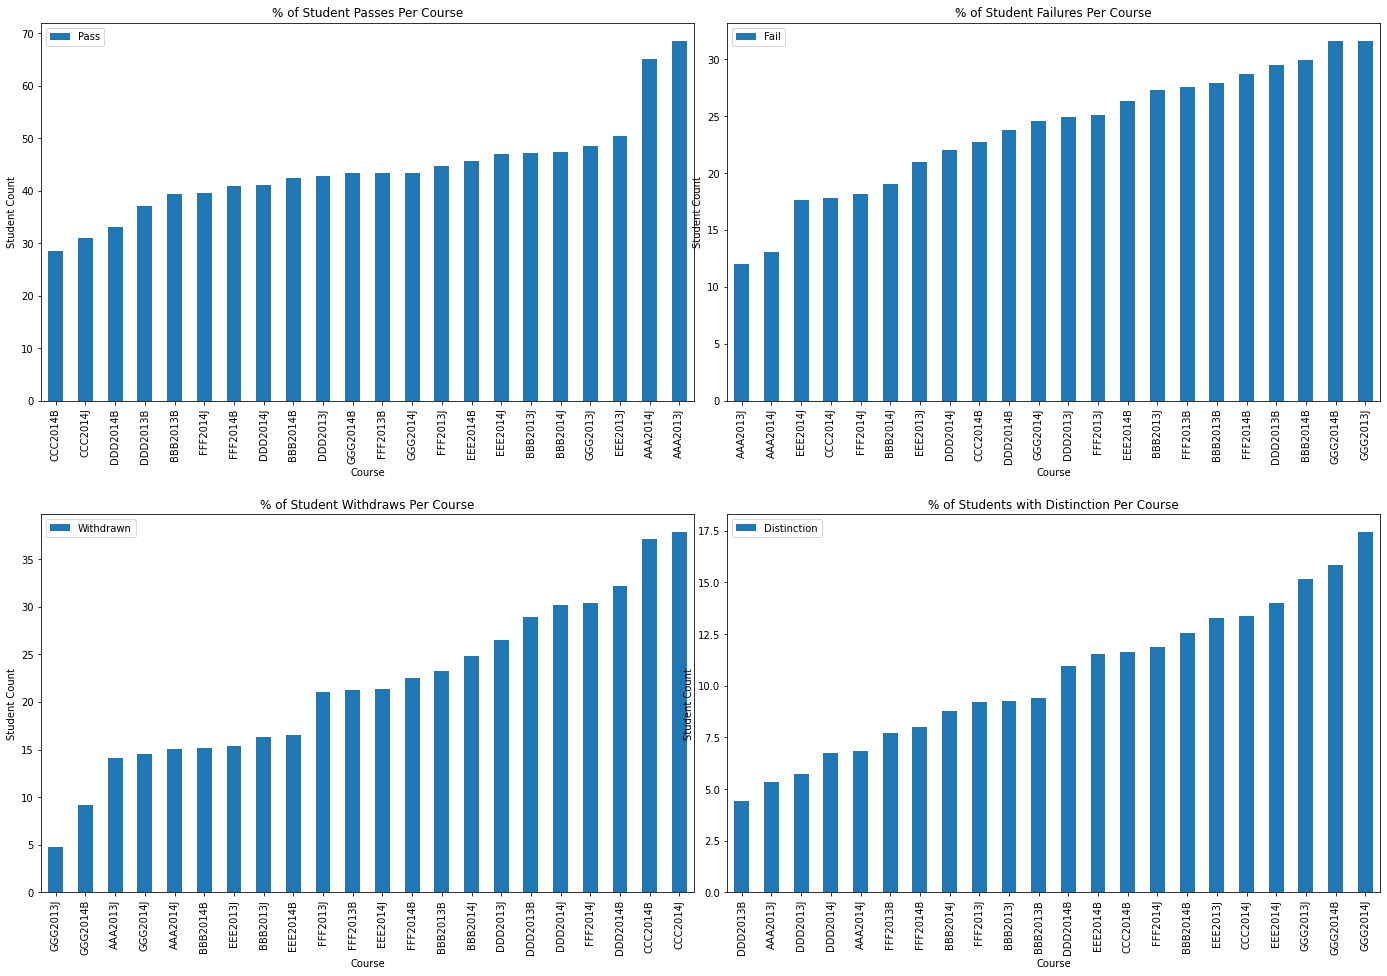

In [1022]:
#Build subplot with three rows and two columns
nrows = 2
ncols = 2
fig, axes = plt.subplots(figsize=(24, 16) , nrows = nrows, ncols = ncols)
plt.subplots_adjust(wspace=.05, hspace=.3)
modpres_res_freq.sort_values(by='Pass').plot.bar(rot=90, ax=axes[0][0], x='module_presentation', y='Pass', title='% of Student Passes Per Course', xlabel='Course', ylabel='Student Count')
modpres_res_freq.sort_values(by='Fail').plot.bar(rot=90, ax=axes[0][1], x='module_presentation', y='Fail', title='% of Student Failures Per Course', xlabel='Course', ylabel='Student Count')
modpres_res_freq.sort_values(by='Withdrawn').plot.bar(rot=90, ax=axes[1][0], x='module_presentation', y='Withdrawn', title='% of Student Withdraws Per Course', xlabel='Course', ylabel='Student Count')
modpres_res_freq.sort_values(by='Distinction').plot.bar(rot=90, ax=axes[1][1], x='module_presentation', y='Distinction', title='% of Students with Distinction Per Course',xlabel='Course', ylabel='Student Count')

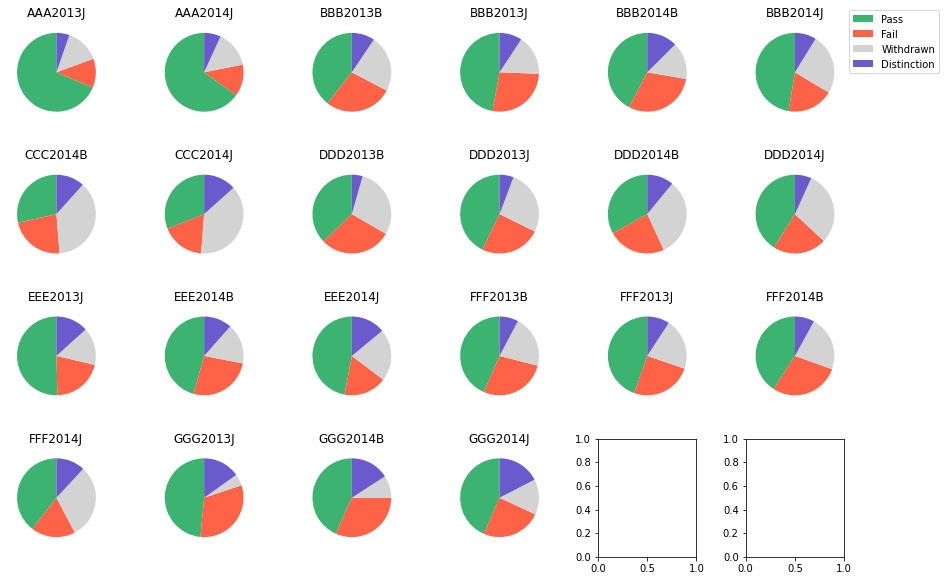

In [1023]:
# multiple pie charts
result_res_freq = pd.crosstab(stud_info['module_presentation'], values=stud_info['result'], columns=stud_info['result'], aggfunc='count', normalize='index')
result_res_freq = result_res_freq[['Pass', 'Fail', 'Withdrawn', 'Distinction']]
fig, axes = plt.subplots(4, 6, figsize=(15, 10))

for i, (idx, row) in enumerate(result_res_freq.iterrows()):
    ax = axes[i // 6, i % 6]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row, startangle=90, colors=['MediumSeaGreen', 'Tomato', 'LightGray','SlateBlue'],  normalize=True)
    ax.set_title(idx)
    
ax.legend(labels=results, bbox_to_anchor=(4,5.5), loc='upper left') 
fig.subplots_adjust(wspace=.5)

We can see here that AAA modules had the highest percentage of students passing with GGG modules having the highest percent of failing students. The results of GGG could be that the full course weight of GGG is on that final exam giving students no chance to balance a poor final performance.

Also noticable here is that the courses which we noted had the highest amount of students have a high amount of failures and withdrawals. It would be interesting to see if class size had an effect on student success, so we will add the column `class_size` reflecting the size of the class each student is enrolled in.

In [895]:
class_size = stud_info.pivot_table(values='id_student', index='module_presentation', aggfunc='count')
stud_info = stud_info.merge(class_size, how='outer', on='module_presentation')
stud_info.rename(columns={'id_student_y':'class_size', 'id_student_x':'id_student'}, inplace=True)

KeyError: 'id_student'

**What are the most significant predictors of student success?**

Cleaning for the algorithms

* For ages we see that there is less than 1% of people in the 55 and over range and so we will combine that with the 35-55 range to make two ranges: 0-35 and 35+

* We will be using classification to identify students as having negative or positive results and so will identify `Distinction` and `Pass` as positive results which we will label as boolean True and `Fail` and `Withdrawn` as negative results which we will label as boolean False. This will be done in another column.

In [104]:
stud_info = stud_info.replace({'age':{'55<=':'35+', '35-55':'35+'}})
classify_results(stud_info)

In [105]:
# dictionary mapping column string names to the above lists to pass to the change_col_val function
col_dict = {'imd':imds, 'region':regions, 'disability':disabilities, 'age_band':ages, 'module':modules, 'highest_education':educations, 'gender':genders, 'final_result':results}

### Assessments Visualizations

* Do certain types of exams get better scores?

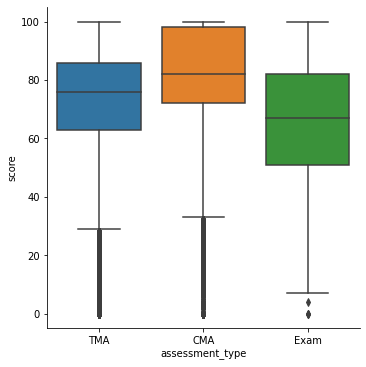

In [15]:
sns.catplot(x='assessment_type', y='score', data=merged_assessments, kind='box')

It seems that Computer Marked Exams get the best average scores, followed by the tutor marked exams and then the final exams.

* Is there a relationship between clicks and exam scores?

In [16]:
not_na_clicks = merged_assessments[(~merged_assessments['sum_click'].isna())]

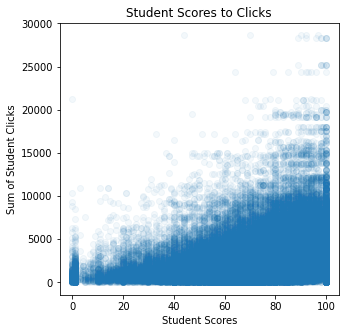

In [21]:
plt.figure(figsize=(5, 5))
plt.title('Student Scores to Clicks')
plt.xlabel("Student Scores")
plt.ylabel("Sum of Student Clicks")
plt.scatter(data=not_na_clicks, y='sum_click', x='score', alpha=.05, )

In [40]:
merged_assessments['sum_click'].max()

28615

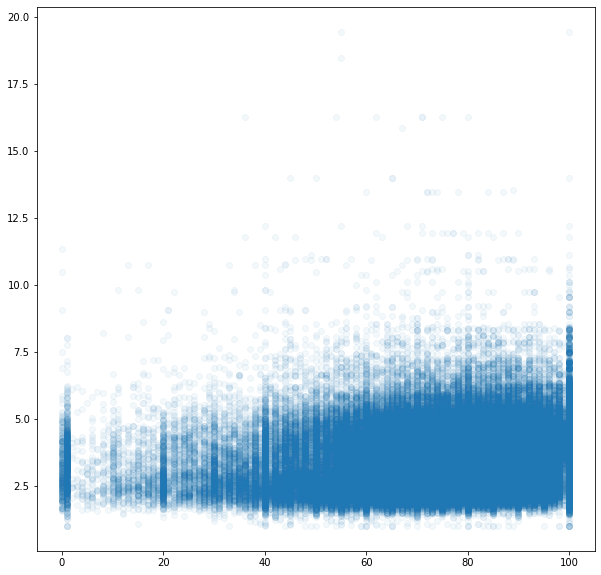

In [42]:
plt.figure(figsize=(10, 10))
plt.scatter(data=not_na_clicks, y='avg_click', x='score', alpha=.05)

* Do some modules get generally better results than others?

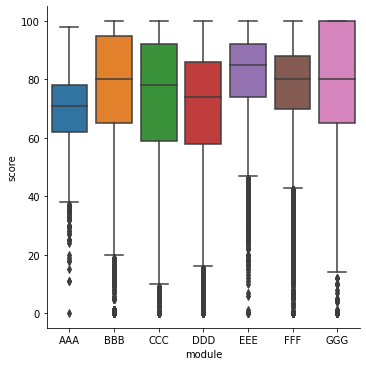

In [43]:
sns.catplot(x='module', y='score', data=merged_assessments, kind='box')

It seems that EEE, FFF and GGG have generally higher exam scores. GGG we saw 

* What are the engagement levels of these modules?

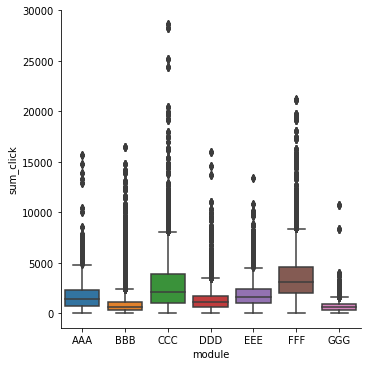

In [50]:
sns.catplot(x='module', y='sum_click', data=not_na_clicks, kind='box')

CCC and FFF have noticably higher engagement scores based on number of clicks than other modules with GGG and BBB having the lowest amount of average engagement.

* Which Module/Presentations had the highest pass percentages?

* Does the assessment weight have an effect on scores?

<AxesSubplot:title={'center':'% of Students with Distinction Per Course'}, xlabel='Course', ylabel='Student Count'>

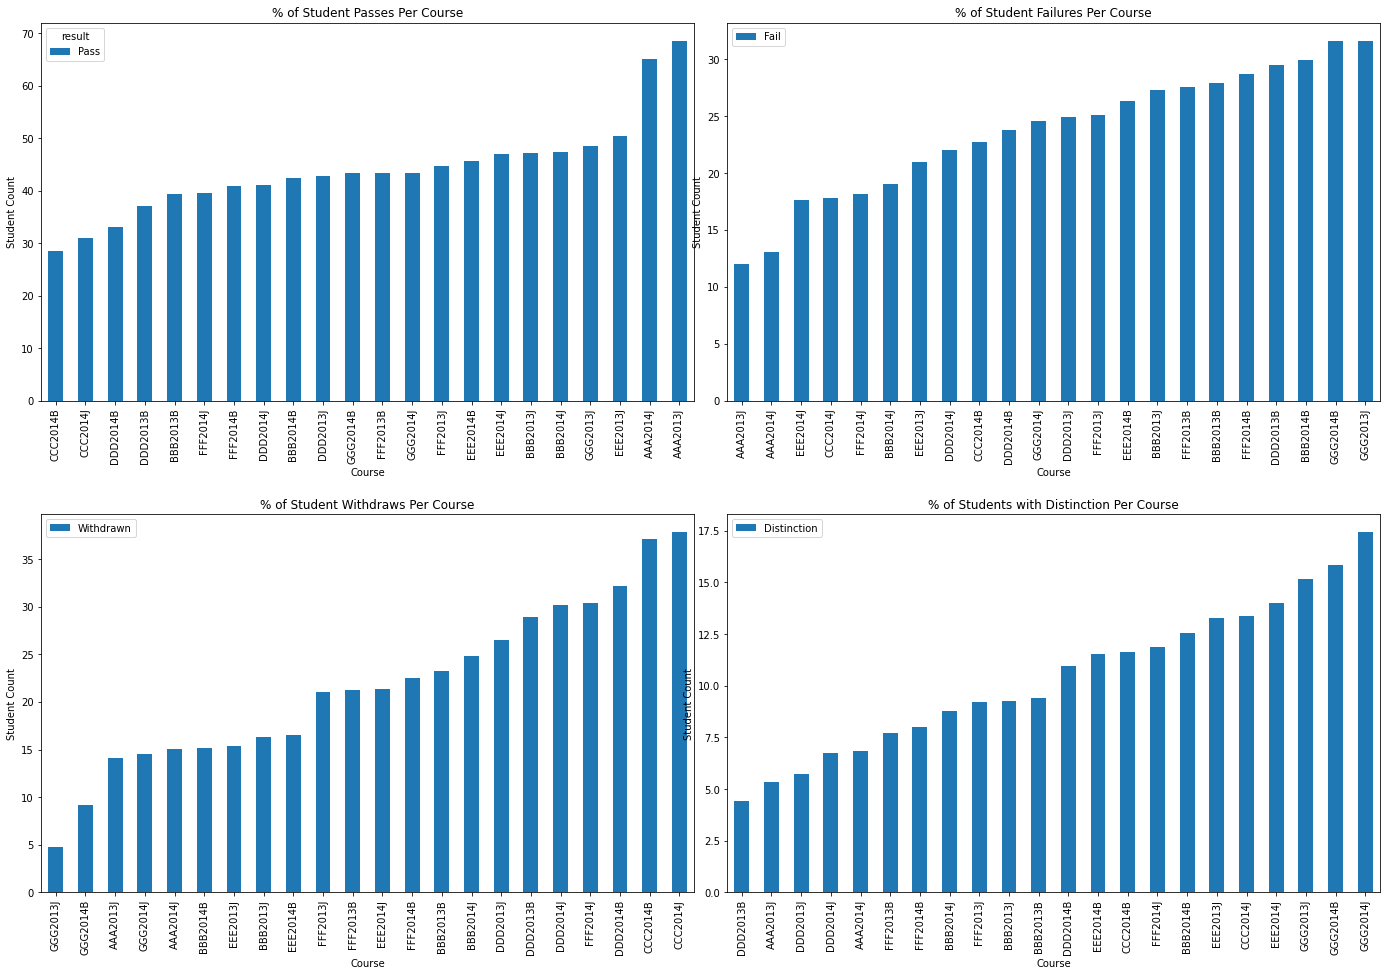

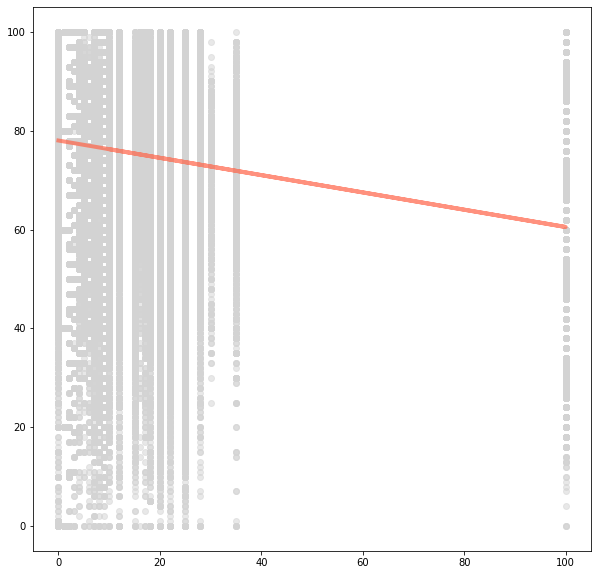

In [183]:
plt.figure(figsize=(10, 10))
x = np.array(merged_assessments['weight'].astype(int))
y = np.array(merged_assessments['score'].astype(int))
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y, alpha=.5, color='lightgrey')
plt.plot(x, m*x + b, color='tomato', lw=4, alpha=.7)

It does seem as the assessment weight increases the average score goes down. There is a large gap in our data though since the non-final exams only go up to weight 35. This might dramatize our relationship here. Let's see if this relationship holds true for exams under weight 100

In [188]:
under_50_weight = merged_assessments.loc[merged_assessments['weight'] < 100]

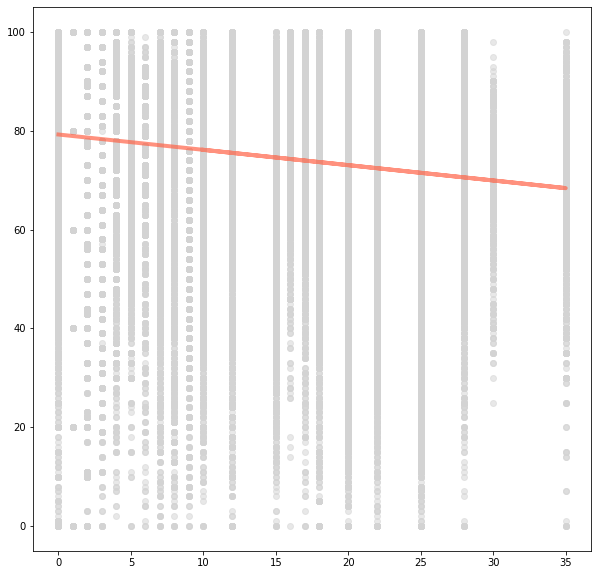

In [189]:
plt.figure(figsize=(10, 10))
x = np.array(under_50_weight['weight'].astype(int))
y = np.array(under_50_weight['score'].astype(int))
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y, alpha=.5, color='lightgrey')
plt.plot(x, m*x + b, color='tomato', lw=4, alpha=.7)

Indeed the exam scores do seem to get worse as the weight of the exams increases.

* Do assessment scores get better over time?

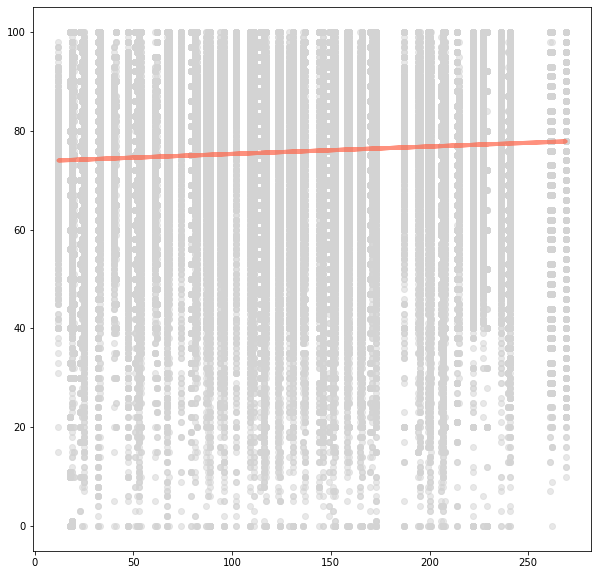

In [181]:
plt.figure(figsize=(10, 10))
x = np.array(merged_assessments['date'].astype(int))
y = np.array(merged_assessments['score'].astype(int))
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y, alpha=.5, color='lightgrey')
plt.plot(x, m*x + b, color='tomato', lw=4, alpha=.7)

According to our line of best fit the assessment scores are getting slightly better over time

* What is the relationship between student scores and date submitted?

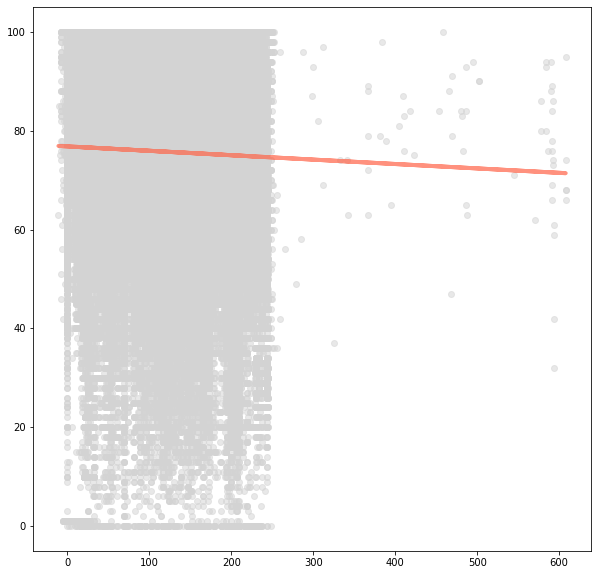

In [182]:
plt.figure(figsize=(10, 10))
x = np.array(merged_assessments['date_submitted'].astype(int))
y = np.array(merged_assessments['score'].astype(int))
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y, alpha=.5, color='lightgrey')
plt.plot(x, m*x + b, color='tomato', lw=4, alpha=.7)

It seems as the date submitted gets later and later, student scores get worse and worse

## Student Info
---
    
* Are any student demographics a good predictor of a student's negative or positive result in a course?

* Are any student demographics a good predictor of scores on exams?
     
* Are any student behaviors a good predictor of a student's negative or positive result in a course? (credits taken, previous attempts, sum click and avg click)

* Are any student behaviors a good predictor of a scores on exams? (credits taken, previous attempts, sum click and avg click)

* Is any assessment information a good predictor of a student's score? (assessment type, weight, date, date_submitted)

## VLE Visualizations

Which resources get the most interaction?

<AxesSubplot:title={'center':'Student Interaction per Activity Type'}, xlabel='activity_type', ylabel='count'>

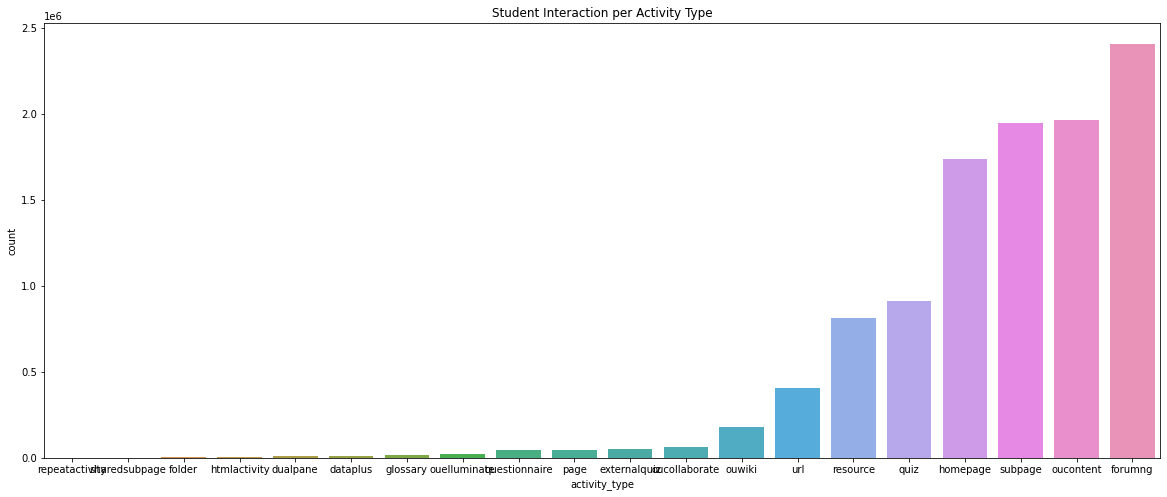

In [194]:
sorted_activities = merged_vle['activity_type'].value_counts().sort_values()
plt.figure(figsize=(20, 8))
plt.title('Student Interaction per Activity Type')
sns.countplot(data=merged_vle, x='activity_type', order = merged_vle['activity_type'].value_counts(ascending=True).index)

Do Clicks increase over time?

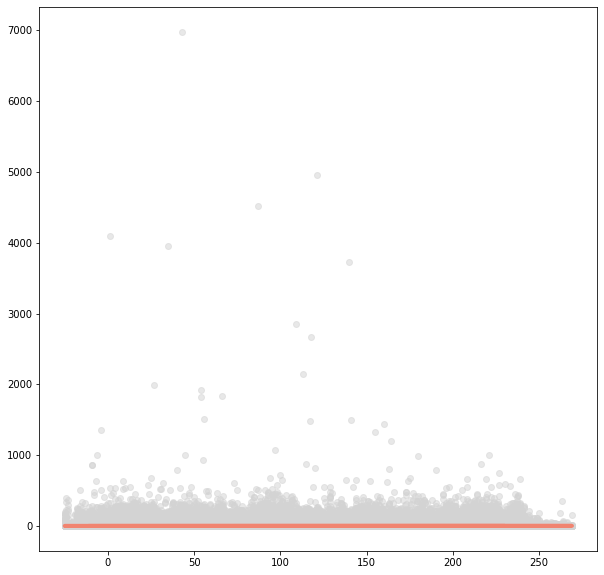

In [207]:
plt.figure(figsize=(10, 10))
x = np.array(merged_vle['date'].astype(int))
y = np.array(merged_vle['sum_click'].astype(int))
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y, alpha=.5, color='lightgrey')
plt.plot(x, m*x + b, color='tomato', lw=4, alpha=.7)

6.0

In [246]:
clicks_per_day = vle_no_outliers.pivot_table(vle_no_outliers, index='date', aggfunc='sum').reset_index()

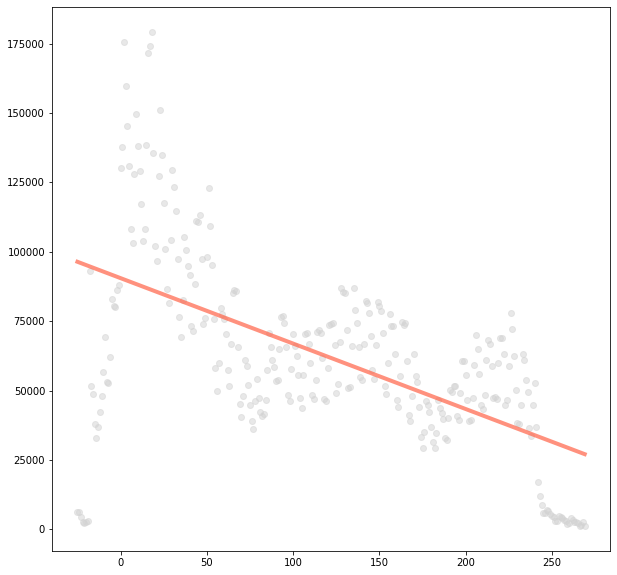

In [247]:
plt.figure(figsize=(10, 10))
x = np.array(clicks_per_day['date'].astype(int))
y = np.array(clicks_per_day['sum_click'].astype(int))
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y, alpha=.5, color='lightgrey')
plt.plot(x, m*x + b, color='tomato', lw=4, alpha=.7)

In [243]:
Q1 = merged_vle['sum_click'].quantile(0.25)
Q3 = merged_vle['sum_click'].quantile(0.75)
IQR = Q3 - Q1


vle_no_outliers = merged_vle[~(merged_vle['sum_click'] > (Q3 + 1.5 * IQR))]

* Is interaction with a certain resource a good predictor of student success?

In [196]:
merged_vle

,module,presentation,id_student,id_site,date,sum_click,activity_type
0,AAA,2013J,28400,546652,-10.0,4.0,forumng
1,AAA,2013J,28400,546652,-10.0,1.0,forumng
2,AAA,2013J,28400,546652,-10.0,1.0,forumng
3,AAA,2013J,28400,546652,-10.0,8.0,forumng
4,AAA,2013J,30268,546652,-10.0,3.0,forumng
...,...,...,...,...,...,...,...
10655275,GGG,2014J,647054,896969,227.0,8.0,oucontent
10655276,GGG,2014J,499187,896969,228.0,8.0,oucontent
10655277,GGG,2014J,629258,896969,228.0,23.0,oucontent
10655278,GGG,2014J,534672,896969,228.0,1.0,oucontent


In [202]:
stud_info_results = stud_info[['id_student', 'result']]

In [206]:
merged_vle_result = merged_vle.merge(stud_info_results, how='outer', on='id_student').dropna()

In [208]:
merged_vle_result

,module,presentation,id_student,id_site,date,sum_click,activity_type,result
0,AAA,2013J,28400,546652,-10.0,4.0,forumng,Pass
1,AAA,2013J,28400,546652,-10.0,1.0,forumng,Pass
2,AAA,2013J,28400,546652,-10.0,1.0,forumng,Pass
3,AAA,2013J,28400,546652,-10.0,8.0,forumng,Pass
4,AAA,2013J,28400,546652,-8.0,3.0,forumng,Pass
...,...,...,...,...,...,...,...,...
12837763,GGG,2014J,656637,896943,0.0,2.0,homepage,Fail
12837764,GGG,2014J,646891,896943,5.0,1.0,homepage,Withdrawn
12837765,GGG,2014J,680345,896943,20.0,1.0,homepage,Fail
12837766,GGG,2014J,680345,896943,22.0,3.0,homepage,Fail


sorted_regions = stud_info['region'].value_counts().sort_values()
plt.figure(figsize=(25, 3))
plt.title('Student Region Distribution')
sns.countplot(data=stud_info, x=stud_info['region'], order = stud_info['region'].value_counts(ascending=True).index).set(xlabel='Regions', ylabel='Student Count')

Conclusions

* Most of our students are under the age of 35, potentially come from lower economic backgrounds and have had less than the equivalent of a high school education.
* Nearly half of our students overall Fail or Withdraw
* GGG courses had the highest percentage of failing students as well as students with distinction. This is likely due to the fact that the whole GGG course was weighted only on the final exam, and rode on students having a good or bad test day without them having room to balance it out with other scores. Despite having the highest percentage of failures, GGG had among the highest exam scores, so it is likely if those scores were included in their final grade these students would have done much better.